# Tabular Feasibility

For Wednesday June 25 you should be well on your way to assess feasibility of your project. This notebook will be submitted Friday June 27. You can find example codes in [Kaggle Lecture](https://github.com/UTA-DataScience/DATA3402.Spring.2025/blob/main/Lectures/Lecture.19/Lecture.19.ipynb) from Data 3402. You can find the recordings of a walk-through in our class Team (`Data 4380- 2024/Lecture Recordings`), Lectures 8 and 10-12.


## Define Project

To establish the context of the feasibility study, write a short introduction, mostly summarizing info that was in your proposal:

* Provide Project link.
* Short paragraph describing the challenge.
* Briefly describe the data.
* What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression?


## Data Loading and Initial Look

First lets establish that the data is in good shape:

* Load the data.
* Count the number of rows (data points) and features.
* Any missing values?
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values?
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
    * If you have a lot of features, summarize (e.g. 100 categorical and 500 numerical features).
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

## Data Visualization

Next perform your first visualizaion:

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression:
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

## Data Cleaning and Preperation for Machine Learning

Based on what you find above, prepare the data for ML.

* Perform any data cleaning. Be clear what are you doing, for what feature.
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [ ]:
## libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('scrubbed.csv')
data.head()

/var/folders/qk/dxtt43753hs4_gp3zxrqxmyr0000gn/T/ipykernel_5004/997564468.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [ ]:
for i in data.columns:
    unique_vals = data[i].unique()
    print(f"\nColumn: {i}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Sample unique values: {unique_vals[:10]}")



Column: datetime
Number of unique values: 69586
Sample unique values: ['10/10/1949 20:30' '10/10/1949 21:00' '10/10/1955 17:00'
 '10/10/1956 21:00' '10/10/1960 20:00' '10/10/1961 19:00'
 '10/10/1965 21:00' '10/10/1965 23:45' '10/10/1966 20:00'
 '10/10/1966 21:00']

Column: city
Number of unique values: 19900
Sample unique values: ['san marcos' 'lackland afb' 'chester (uk/england)' 'edna' 'kaneohe'
 'bristol' 'penarth (uk/wales)' 'norwalk' 'pell city' 'live oak']

Column: state
Number of unique values: 68
Sample unique values: ['tx' nan 'hi' 'tn' 'ct' 'al' 'fl' 'ca' 'nc' 'ny']

Column: country
Number of unique values: 6
Sample unique values: ['us' nan 'gb' 'ca' 'au' 'de']

Column: shape
Number of unique values: 30
Sample unique values: ['cylinder' 'light' 'circle' 'sphere' 'disk' 'fireball' 'unknown' 'oval'
 'other' 'cigar']

Column: duration (seconds)
Number of unique values: 706
Sample unique values: ['2700' '7200' '20' '900' '300' '180' '1200' '120' '1800' '30']

Column: duration (h

In [ ]:
shape_counts = data['shape'].astype(str).str.lower().value_counts()

for value, count in shape_counts.items():
    print(f"'{value}' appears {count} times")


'light' appears 16565 times
'triangle' appears 7865 times
'circle' appears 7608 times
'fireball' appears 6208 times
'other' appears 5649 times
'unknown' appears 5584 times
'sphere' appears 5387 times
'disk' appears 5213 times
'oval' appears 3733 times
'formation' appears 2457 times
'cigar' appears 2057 times
'changing' appears 1962 times
'nan' appears 1932 times
'flash' appears 1328 times
'rectangle' appears 1297 times
'cylinder' appears 1283 times
'diamond' appears 1178 times
'chevron' appears 952 times
'egg' appears 759 times
'teardrop' appears 750 times
'cone' appears 316 times
'cross' appears 233 times
'delta' appears 7 times
'round' appears 2 times
'crescent' appears 2 times
'pyramid' appears 1 times
'flare' appears 1 times
'hexagon' appears 1 times
'dome' appears 1 times
'changed' appears 1 times


In [ ]:
## find missing valuves empty
missingcount = data.isnull().sum()
print(missingcount)

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64


In [ ]:
### lets see if there are entries lablled nan

missing_indicators = ['nan', 'na', 'n/a', 'null', 'none', 'unknown', '?', '']

suspect_counts = {}

for col in data.columns:
    count = data[col].astype(str).str.lower().isin(missing_indicators).sum()
    suspect_counts[col] = count

missing_summary = pd.DataFrame.from_dict(suspect_counts, orient='index', columns=['Suspect Missing Count'])
print(missing_summary)

                      Suspect Missing Count
datetime                                  0
city                                     41
state                                  5797
country                                9670
shape                                  7516
duration (seconds)                        0
duration (hours/min)                      0
comments                                 16
date posted                               0
latitude                                  0
longitude                                 0


In [ ]:
### The unknown entries in comments doswent really matter becaause we wont need the comments colum BUT they matter in shape, state, countrym city

missing_indicators = ['nan', 'na', 'n/a', 'null', 'none', 'unknown', '?', '']

data_str = data.astype(str).apply(lambda col: col.str.lower())

mask = data_str.isin(missing_indicators).any(axis=1)

data_cleaned = data[~mask].copy()

print(f"Original rows: {len(data)}")
print(f"Cleaned rows: {len(data_cleaned)}")


Original rows: 80332
Cleaned rows: 61741


In [ ]:
shape_counts = data_cleaned['shape'].astype(str).str.lower().value_counts()

for value, count in shape_counts.items():
    print(f"'{value}' appears {count} times")

'light' appears 14130 times
'triangle' appears 6817 times
'circle' appears 6405 times
'fireball' appears 5364 times
'other' appears 4705 times
'sphere' appears 4552 times
'disk' appears 4318 times
'oval' appears 3160 times
'formation' appears 2088 times
'cigar' appears 1717 times
'changing' appears 1653 times
'flash' appears 1124 times
'rectangle' appears 1117 times
'cylinder' appears 1079 times
'diamond' appears 969 times
'chevron' appears 852 times
'teardrop' appears 614 times
'egg' appears 609 times
'cone' appears 257 times
'cross' appears 197 times
'delta' appears 7 times
'round' appears 2 times
'pyramid' appears 1 times
'flare' appears 1 times
'hexagon' appears 1 times
'crescent' appears 1 times
'changed' appears 1 times


In [ ]:
def summarize_values(col, dtype):
    if dtype == "Numerical":
        return f"{col.min():.3f} to {col.max():.3f}"
    else:
        unique_vals = col.astype(str).str.lower().unique()
        preview = ", ".join(unique_vals[:3])  # just 3 for clarity
        if len(unique_vals) > 3:
            preview += ", ..."
        return preview

summary = []

for col in data_cleaned.columns:
    dtype = "Numerical" if pd.api.types.is_numeric_dtype(data[col]) else "Categorical"
    values = summarize_values(data[col], dtype)
    summary.append({
        "Feature": col,
        "Type": dtype,
        "Sample Values / Range": values
    })

summary_df_cleaned = pd.DataFrame(summary)

print("\n{:<25} {:<12} {}".format("Feature", "Type", "Sample Values / Range"))
print("-" * 70)
for _, row in summary_df_cleaned.iterrows():
    print("{:<25} {:<12} {}".format(row['Feature'], row['Type'], row['Sample Values / Range']))



Feature                   Type         Sample Values / Range
----------------------------------------------------------------------
datetime                  Categorical  10/10/1949 20:30, 10/10/1949 21:00, 10/10/1955 17:00, ...
city                      Categorical  san marcos, lackland afb, chester (uk/england), ...
state                     Categorical  tx, nan, hi, ...
country                   Categorical  us, nan, gb, ...
shape                     Categorical  cylinder, light, circle, ...
duration (seconds)        Categorical  2700, 7200, 20, ...
duration (hours/min)      Categorical  45 minutes, 1-2 hrs, 20 seconds, ...
comments                  Categorical  this event took place in early fall around 1949-50. it occurred after a boy scout meeting in the baptist church. the baptist church sit, 1949 lackland afb&#44 tx.  lights racing across the sky &amp; making 90 degree turns on a dime., green/orange circular disc over chester&#44 england, ...
date posted               Categori

In [ ]:
print("Latitude dtype:", data_cleaned['latitude'].dtype)

# Step 2: Try converting to numeric (errors='coerce' turns non-numeric into NaN)
lat_numeric = pd.to_numeric(data_cleaned['latitude'], errors='coerce')

# Step 3: Find entries that failed the numeric conversion
non_numeric_lats = data_cleaned['latitude'][lat_numeric.isna()].unique()

# Display suspect values
print("\nNon-numeric or malformed 'latitude' values:")
for val in non_numeric_lats:
    print(f"- {val}")


Latitude dtype: float64

Non-numeric or malformed 'latitude' values:


In [ ]:
data_cleaned['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')

In [ ]:
print(data_cleaned.dtypes)import matplotlib.pyplot as plt

# Loop through all columns
for col in data.columns:
    # Get value counts (convert to str to unify types)
    value_counts = data[col].astype(str).value_counts().sort_values(ascending=False)[:20]  # top 20 for readability

    plt.figure(figsize=(10, 4))
    value_counts.plot(kind='bar')
    plt.title(f"Top Unique Values in '{col}'")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object


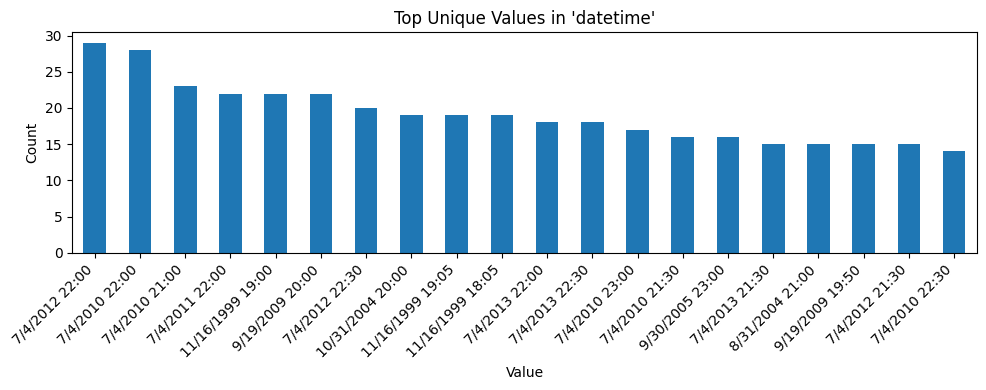

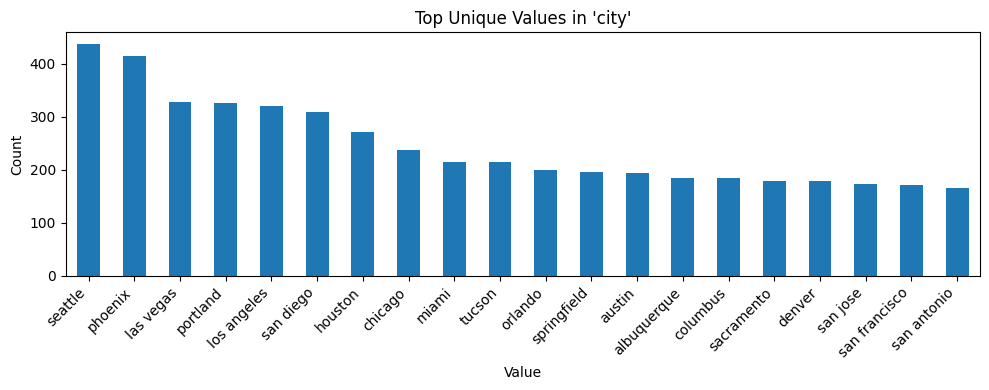

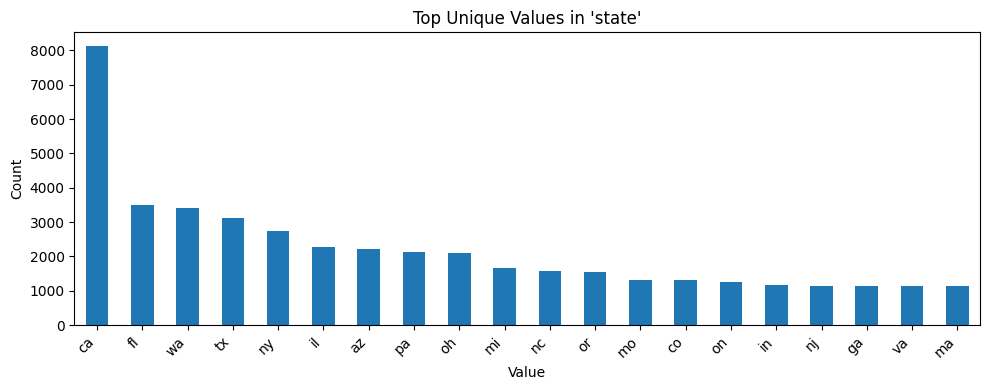

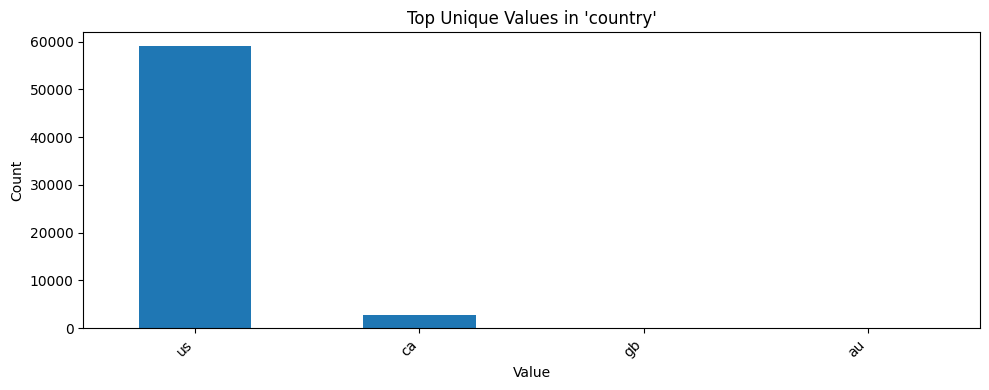

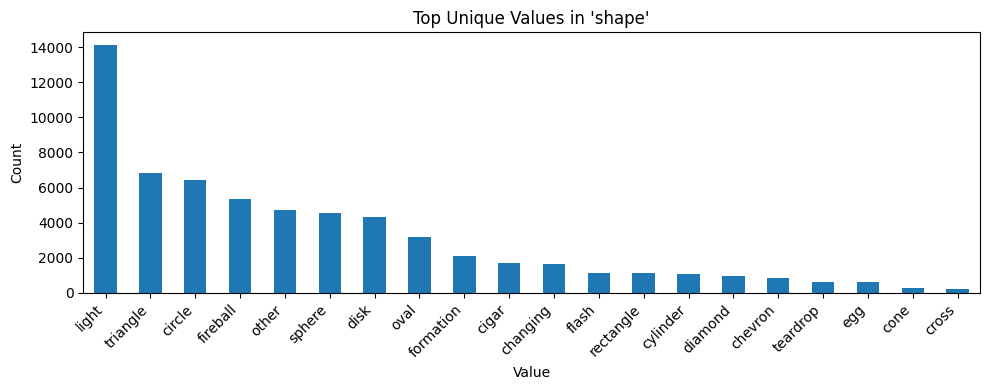

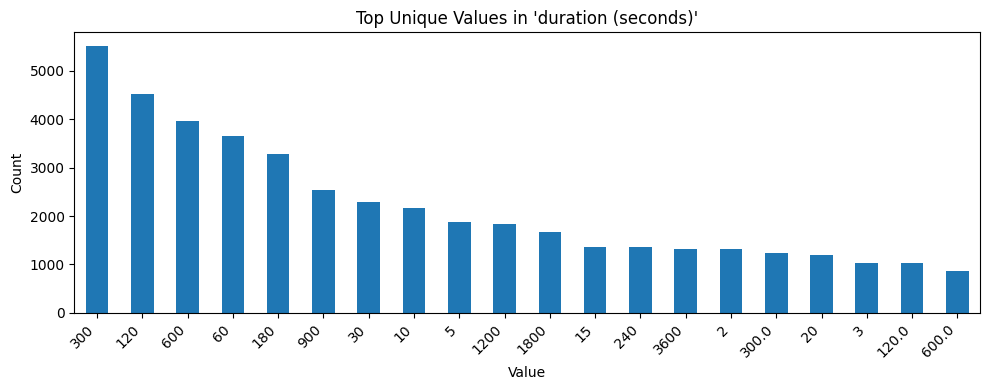

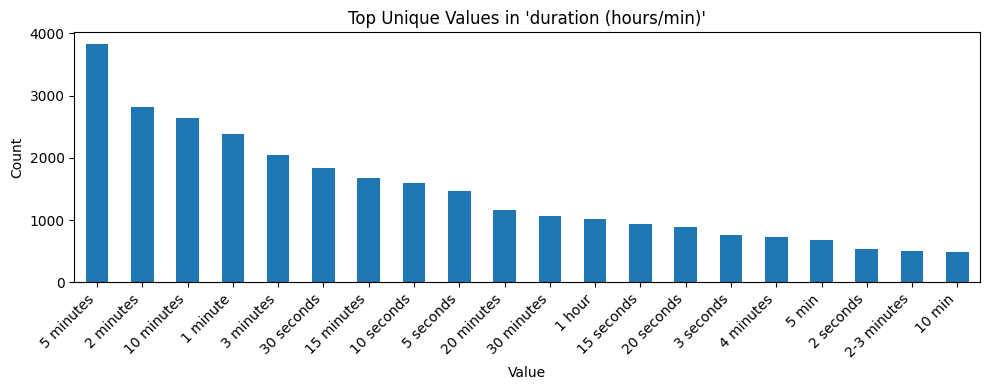

/var/folders/qk/dxtt43753hs4_gp3zxrqxmyr0000gn/T/ipykernel_5004/2107439019.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


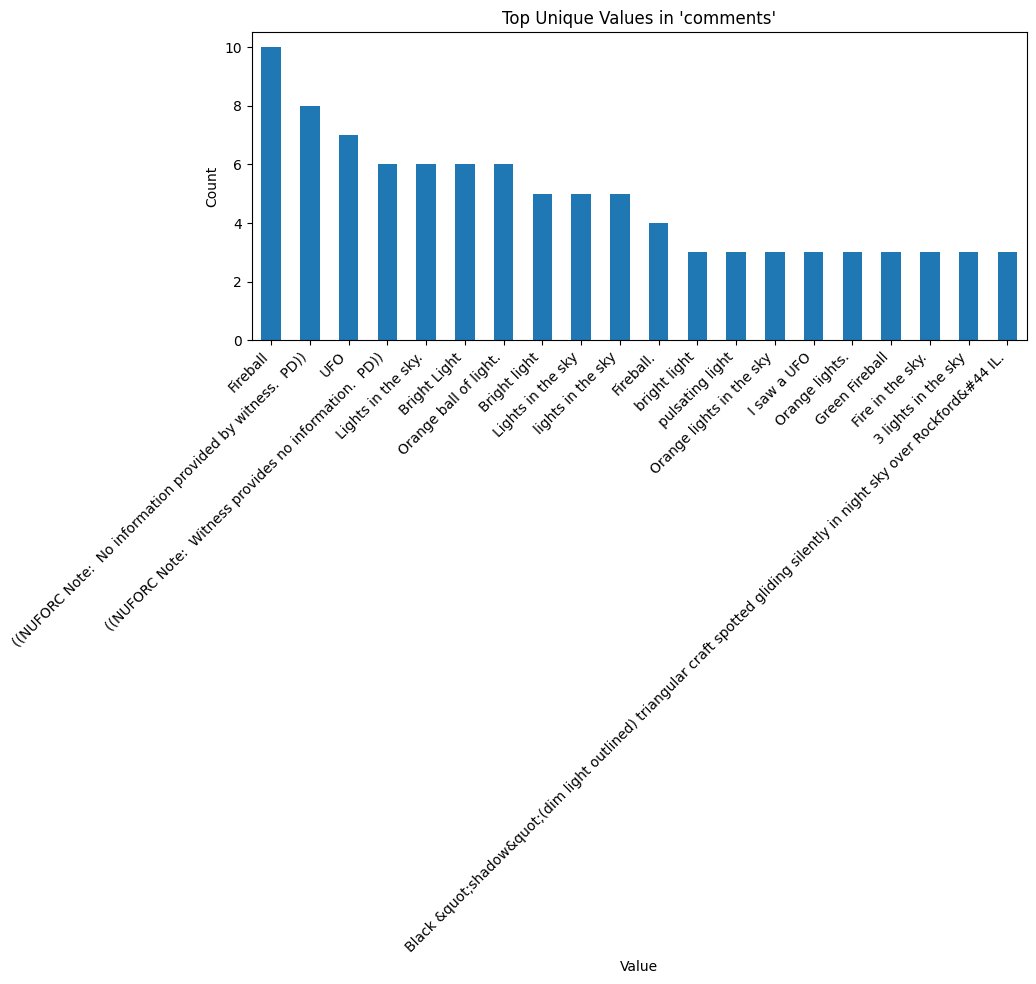

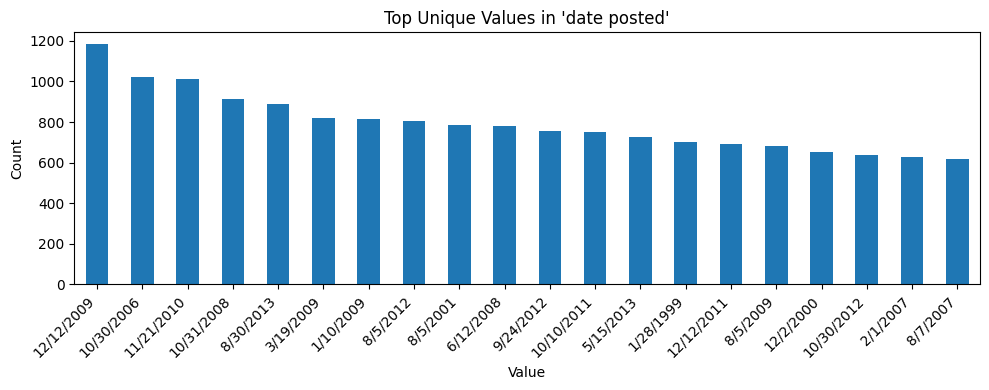

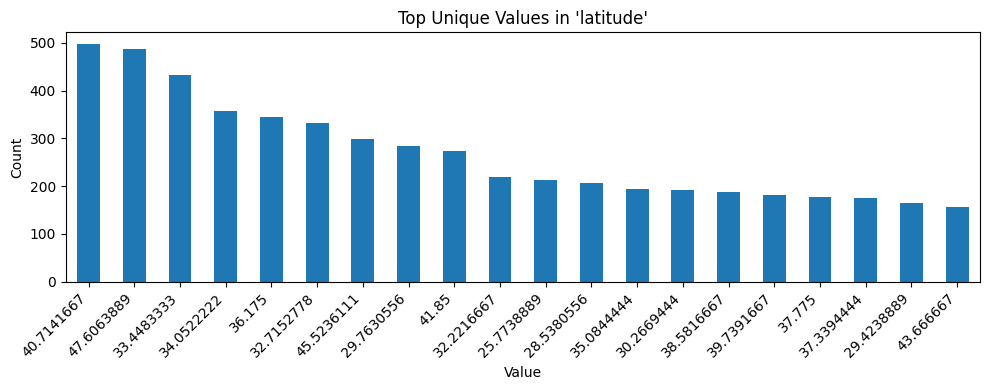

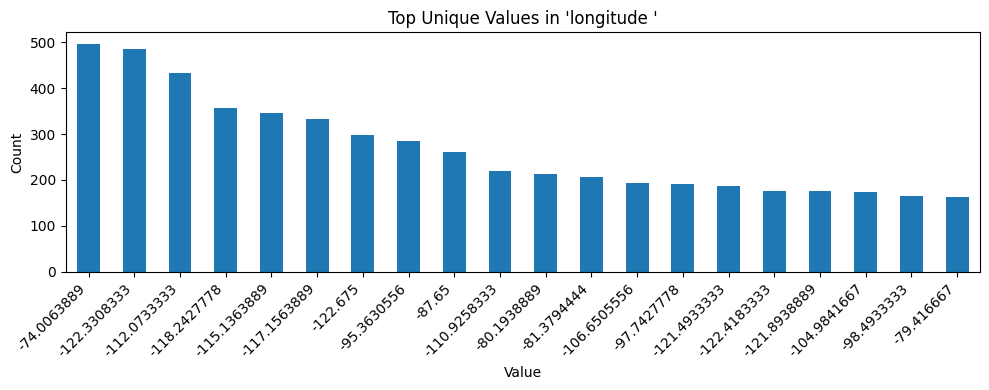

In [ ]:
import matplotlib.pyplot as plt

for col in data_cleaned.columns:
    value_counts = data_cleaned[col].astype(str).value_counts().sort_values(ascending=False)[:20]  # top 20 for readability

    plt.figure(figsize=(10, 4))
    value_counts.plot(kind='bar')
    plt.title(f"Top Unique Values in '{col}'")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
## time binning
